# 연구 목표 수립

- 유사 서비스 구현
  - 파파고, 카카오 번역, 구글 번역
  - 이들 서비스들 중에서 **언어감지**를 머신러닝을 구현하여 웹 서비스를 구현하여 적용해 보기
- 목표
  - 머신러닝으로 만들어진 모델이 어떻게 실제 적용되는지 이해
  - 앞선 과정과 머신러닝에서 산출까지 어덯게 연결되는지 과정 이해
- 조건
  - 머신러닝을 배운적이 없어서 필요한 것 외에는 전부 가정하고 진행
  - 언어 감지 영역
    - 알파벳을 사용하는 언어권만 대상
    - a-z 까지 문자를 대상(26)
    - 논문참고
      - **알파벳을 문자로 사용하는 국가별로 사용하는 언어 체계에서 a-z까지 사용빈도가 다르다**(관련 논문)
      - 이를 근거로 언어별로 알파벳 사용빈도가 다르다라는 주장을 기반으로 프로젝트가 진행(데이터 분석 단계에서 간단하게 시각적으로 확인)
    - 문자 26개, 정답 1개(영어, 프랑스어, 인도네시아어, 타갈리어,..)
    - shape => (n, 26+1)
    - **말뭉치 -> a-z까지 특정 말뭉치상에 등장한 빈도수 : 데이터 전처리**
    - 예측 결과
      - 이 말뭉치는 영어 입니다. 
      - 이 말뭉치는 프랑스어 입니다. 
      - **위의 같은 표현은 지도학습(정답이 있으니까) 정답에 카테고리화가 되어 있어서 분류의 문제이다. **


- 산출물
  - 웹서비스 구현
    - 페이지 1장
    - 가장 간단하게 flask를 통해서 구현
      - 장점 : flask는 마이크로 에디션, 경량, 자유도가 높고, 모듈 이식이 간단하다(파이썬과 동일)

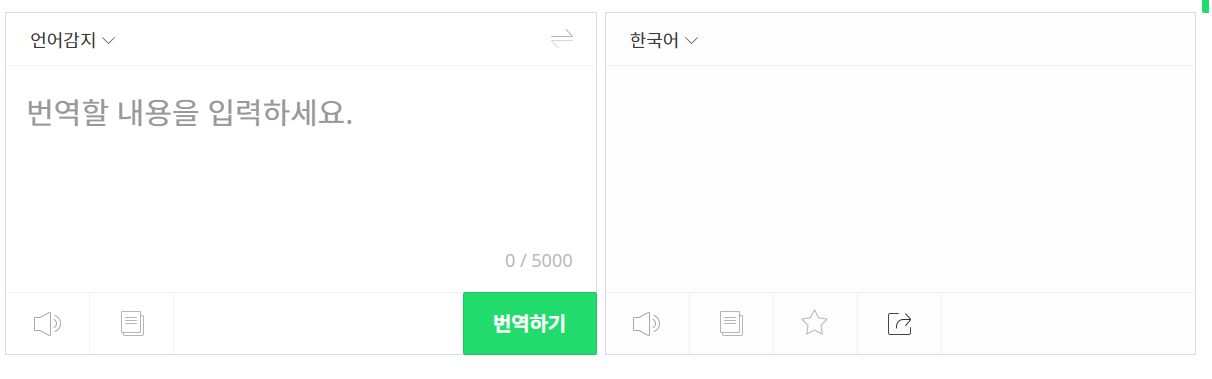

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/k-디지털-품질재단/머신러닝/res/산출물.png')
# 산출물 예시

# 데이터 수집/획득

- 실전방식
  - 여기서는 train.zip, test.zip을 활용

- 수업방식
  - 위키피디아에서 데이터를 수집 -> 전처리-> 정규화 -> 데이터 정제과정을 거쳐서 구축
  - (n, 26 + 1)
  - 26개의 독립변수는 수치(빈도수)로, 1개의 종속변수는 국가코드로 표현(en, fr,..)
  - 아래 링크 데이터를 기준으로 말뭉치를 가져와서 데이터화 해보겠다
    - https://en.wikipedia.org/wiki/BTS
    - 타겟 사이트 점검 결과 Level 3 웹 스크래핑 기술만으로 가능하다
      - BS4를 사용해서 필요한 만큼 추출(텍스트만 추출) 
      - BS4 -> html 텍스트 -> 파싱 -> Dom tree -> html을 탐색해서 원문만 추출 (css selector or xpath)
      - css selector 사용
        - **#mw-content-text p**
        - 이 요소 하위에 있는 텍스트만 추출

  
  - 제공된 파일 사용(최종)


## 모듈 가져오기

In [ ]:
!pip list

In [3]:
import urllib.request as req
from bs4 import BeautifulSoup

## 사이트 접속

In [10]:
target_site = 'https://en.wikipedia.org/wiki/BTS'
res = req.urlopen( target_site )
res

## 파싱

- html을 DOM(Document Object Model)모델로 로드하는 작업 : 파싱
- dom : html의 마크업 랭귀지를 객체화 해서 조작, 탐색하겠금 제공해주는 기술
- 파싱하는 도구는 파서(parser)
  - 'html5lib' : 느리지만, 대용량 html 파일도 처리 가능하다, 정확하게 처리한다

In [11]:
soup = BeautifulSoup( res, 'html5lib')
#soup

## 데이터 추출

In [12]:
# 추출
# 해당 css selector에 일치되는 모든 요소를 가져온다 => 리스트
ps = soup.select( '#mw-content-text p' )
len( ps )

54

In [21]:
ps[10].text

# ps에서, 텍스트를 모두 추출해서, 리스트,에 담으시오?(실습 3분)
# for -> 동적으로 데이터를 추출해서 담겠다
tmp = list()
for p in ps:
  tmp.append( p.text )
tmp[:2]

['\n', '\n\n\n']

In [20]:
# 리스트 내포
tmp = [ p.text for p in ps ]
tmp[:10]
# 데이터가 지저분하다 => a-z 남겨야 하는데? => 케이스가 많다 => 정규식 고려!!

['\n',
 '\n\n\n',
 'BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n',
 'After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (

- 데이터 수집 단계에서 데이터 전처리 단계로 산출물을 넘길때, 말뭉치(하나의 문자열 형태로) 넘기겠다
- 리스트(구성원은 문자열) => 문자열 1개로 전달(실습 1분) 

In [22]:
# 구분자를 넣고 한개의 문자열로 통합 => 문자열.join( 연속형데이터 )
tmps = ' '.join( tmp )
tmps

'\n \n\n\n BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (2016), was th

- 잡음 제거(전처리 과정인데, 여기서 진행)
- a-z가 아닌 문자는 모두 제거한다 -> 정규식

In [23]:
import re

In [24]:
# [] : 문자(글자) 한개 1개
# a-z : 알파벳 a ~ z까지 26개중에 한개
# [a-z] : a ~ z까지 중에 아무거나 1개
# A-Z : 알파벳 A ~ Z까지 26개중에 한개
# [a-zA-Z] : a ~ z 혹은 A ~ Z 중에 아무거나 1개
# * : 0~ 무한대
# + : 1~ 무한대
# [^]: [^ ... ] 문자 클레스안에 있는 글자를 제외하고
pattern = '[^a-zA-Z]*'
p = re.compile( pattern )

In [26]:
# 알파벳이 아닌 문자들을 모두 찾아서 '' 으로 대체해라
# 일반적으로 영어 알파벳을 자연어 처리할때, 통상 소문자로 바꿔서 처리한다
tmp = p.sub( '' , tmps ).lower()
tmp

'btskoreanrrbangtansonyeondanalsoknownasthebangtanboysisasouthkoreanboybandthatwasformedinanddebutedinunderbighitentertainmenttheseptetconsistingofmembersjinsugajhopermjiminvandjungkookcowritesandcoproducesmuchoftheirownoutputoriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenrestheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismtheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineafterdebutinginwiththeirsinglealbumcoolskoolbtsreleasedtheirfirstkoreanlanguagestudioalbumdarkwildandjapaneselanguagestudioalbumwakeupinthegroupssecondkoreanstudioalbumwingswastheirfirsttosellonemillioncopiesinsouthkoreabybtscrossedintotheglobalmusicmarketleadingthekoreanwaveintotheunitedstatesandbreakingnumeroussalesrecordstheybecamethefirstkoreangrouptoreceiveacertificationfromtherecordingindustryassociationofamericaria

# 데이터 준비/전처리/정제

# 데이터 분석

# 모델구축

# 시스템통합, 산출물, 보고서